# Chapter 4. 그래프 그리기

판다스를 활용한 데이터 시각화를 알아보자. 목차는 다음과 같다. 

 - 4-1 데이터시각화가 필요한 이유
 - 4-2 matplotlib라이브러리 자유자재로 사용하기 
 - 4-3 seaborn라이브러리 자유자재로 사용하기
 - 4-4 데이터프레임과 시리즈로 그래프 그리기
 - 4-5 seaborn라이브러리로 그래프 스타일 설정하기

## 4-1 데이터 시각화가 필요한 이유

### 앤스콤 4분할 그래프 살펴보기
데이터 시각화를 보여주는 전형적인 사례로 앤스콤 4분할 그래프가 있다. 이 그래프는 프랭크 앤스콤이 데이터를 시각화하지 않고 수치만 확인할 대 발생할 수 있는 함정을 보여주기 위해 만든 그래프인데, 이를 알아보자.

#### 앤스콤이 지적한 함정과 데이터 시각화의 필요성
앤스콤 4분할 그래프를 구정하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x,y열을 가지고 있다. 그런데 이 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있다. 그래서 이런 결과만 보고 "데이터 그룹 1,2,3,4의 데이터는 모두 같을것이다"라고 착각할 수 있다. 바로 이 것이 앤스콤이 지적한 함정이다. 하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 데이터 패턴을 가지고 있다는 검을 금방 알 수 있다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있다. 그러면 데이터 시각화란 무엇인지 직접 실습하며 알아보도록 하자.

### 앤스콤 데이터 집합 불러온 후 그래프 생성

#### 1. 앤스콤 데이터 집합 불러오기
앤스콤 데이터 집합은 seaborn 라이브러리에 포암되어 있다. seaborn 라이브러리의 load_dataset 메서드에 문자열 anscombe를 전달하면 앤스콤 데이터 집합을 불러올 수 있다. 이때 데이터 프레임의 열 이름중 dataset열이 데이터 그룹을 구분한다는 것을 알 수 있다.

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

#### 2. matplotlib 라이브러리로 그래프 그리기
데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 된다. matplotlib 라이브러리를 사용해서 불러오도록 하자.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

#### 3. 
다음은 anscombe 데이터프레임의 datset 열에서 데이터 값이 1인 것만 추출한 것이다. 

In [3]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

#### 4. 
선 그래프는 plot 메서드로 그리자. plot 메서드의 x,y축 데이터를 전달하면 선 그래프가 나타나게 된다. 앞에서 준비한 dataset_1의 x,y열을 전달 하자.

<IPython.core.display.Javascript object>


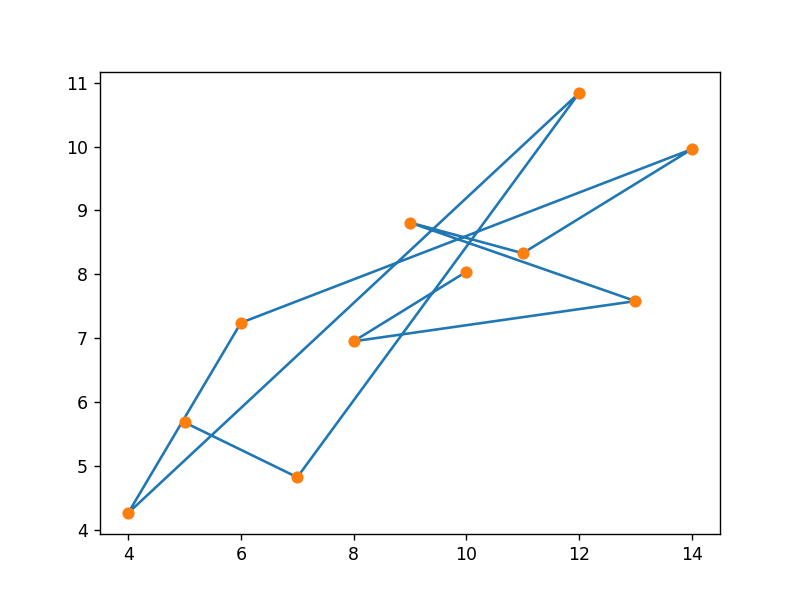

In [4]:
plt.plot(dataset_1['x'], dataset_1['y'])

#### 5. 
plot 메서드는 기본적으로 선으로 그래프를 그린다. 만약 점으로 그래프를 그리려면 o을 세번 째 인자로 전달 하면 된다.

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기
앤스콤 데이터 집합은 4개의 데이터 그룹으로 구성되어 있으며 각 데이터 그룹의 차이를 파악하려면 그래프로 시각화해야 한다. 이번에는 모든 그래프를 그려보자. 

#### matplotlib 라이브러리로 그래프 그리기

1. 전체 그래프가 위치할 기본 틀을 만든다.
2. 그래프를 그려 넣을 그래프 격자를 만든다.
3. 그런 다음에 격자에 그래프를 하나씩 추가한다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향
4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣는다.

### 한 번에 4개의 그래프 그리기

#### 1. 
앤스콤 데이터프레임의 dataset열의 값이 1,2,3,4인 것을 불린 추출하여 dataset_1,2,3,4에 저장하자.

In [7]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#### 2. 
먼저 그래프 격자가 위치할 기본 틀을 만들어 둔다.

<IPython.core.display.Javascript object>


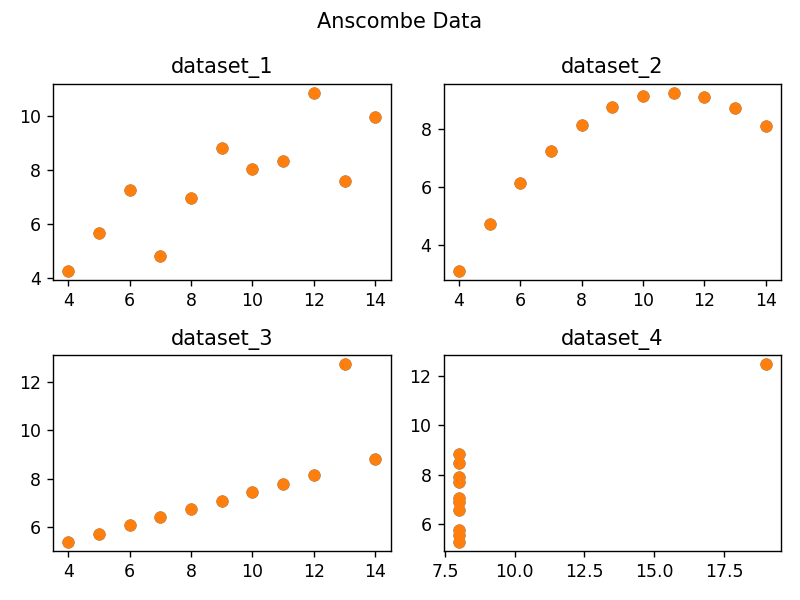

In [8]:
fig = plt.figure()

#### 3. 
그런 다음 add_subplot 메서드로 그래프 격자를 그린다. 기본 틀(fig)에 격자를 추가하는 느낌으로 add_subplot 메서드를 사용하면 된다. 각 인자에서 첫번째는 행 크기, 열크기를 나타낸다.

In [9]:
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

#### 4. 
이제 plot 메서드에 데이터를 전달하여 그래프를 그리자. 그래프를 확인하기 위해서는 fig로 확인 가능하다.

<IPython.core.display.Javascript object>


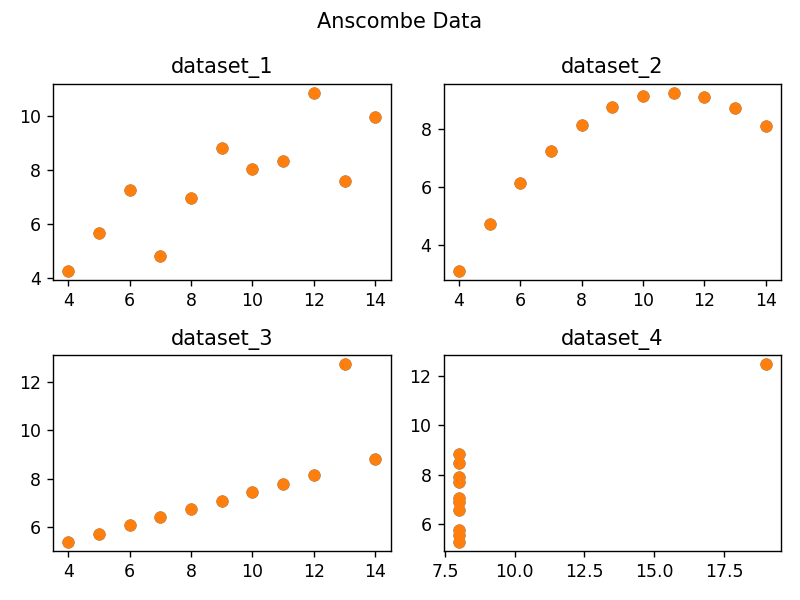

In [13]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

#### 5. 
각각의 그래프를 쉽게 구분할 수 있도록 그래프 격자에 제목을 추가 해보자. set_title 메서드를 사용한다.


In [14]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

Text(0.5, 1.0, 'dataset_4')

#### 6. 
기본 틀에도 제목을 추가 해주자. suptitle메서드를 사용한다.

<IPython.core.display.Javascript object>


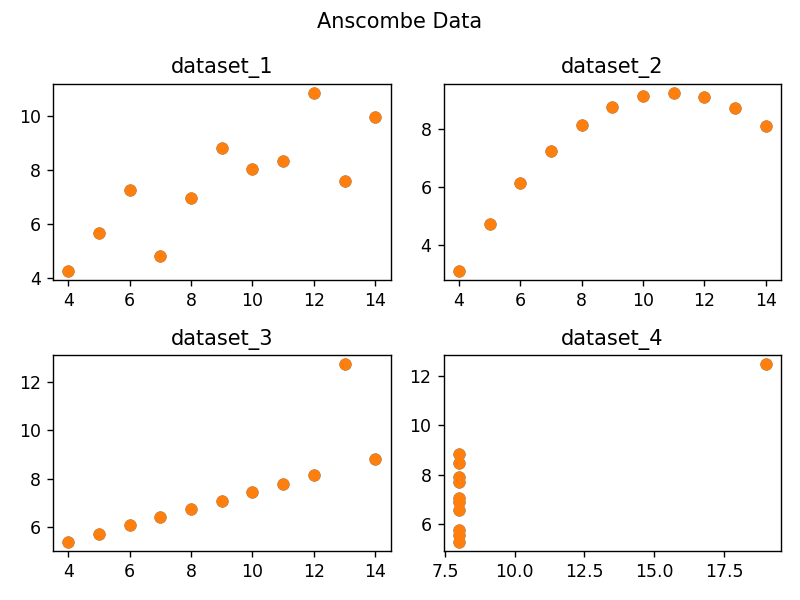

In [16]:
fig.suptitle("Anscombe Data")

fig

#### 7. layout 조정

위 그림에는 글자가 겹치게 되는데 이는 tight_layout 메서드를 사용해 레이아웃을 조절하자.

<IPython.core.display.Javascript object>


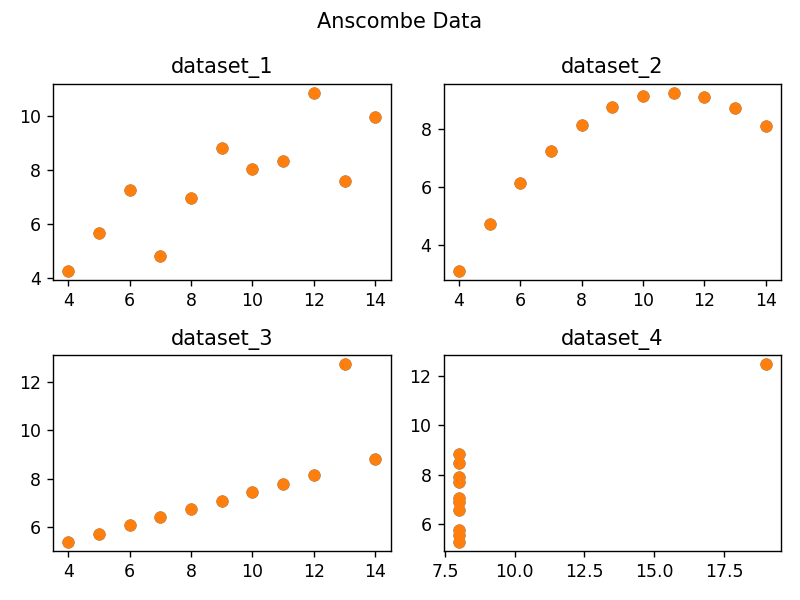

In [17]:
fig.tight_layout()

fig

## 4-2 matplotlib 라이브러리 자유자재로 사용하기

### 기초 그래프 그리기 

seaborn 라이브러리에는 tips라는 데이터 집합이 존재 한다. tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아두 ㄴ것이다.ㅏ 이번 에는 tips 데이터 집합을 사용해 다양한 그래프를 그려보자. 

### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프

#### 1. 
tips 데이터 집합을 불러와 변수 tips에 저장하자. tips데이터프레임은 지불금액, 팁, 성별, 흡연 유무, 요일, 시간, 전체 인원 정보를 담고 있다

In [18]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


#### 2. 히스토그램
히스토그램을 그려보자. 히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주사용하는 그래프이다. 이대 데이터프레임의 total_bill, tips 등의 열을 변수라고 부른다. 기본틀을 생성 하교 격자를 우선 구성 해주자. 그리고 hist 메서드에 total_bill 열을 전달하면 히드토그램이 생성된다. 이때 x축의 간격은 bins 옵션으로 조정이 가능하다. bins 값을 10으로 지정하면 x축의 간격을 10으로 조정 가능하다는 뜻이다. 

<IPython.core.display.Javascript object>


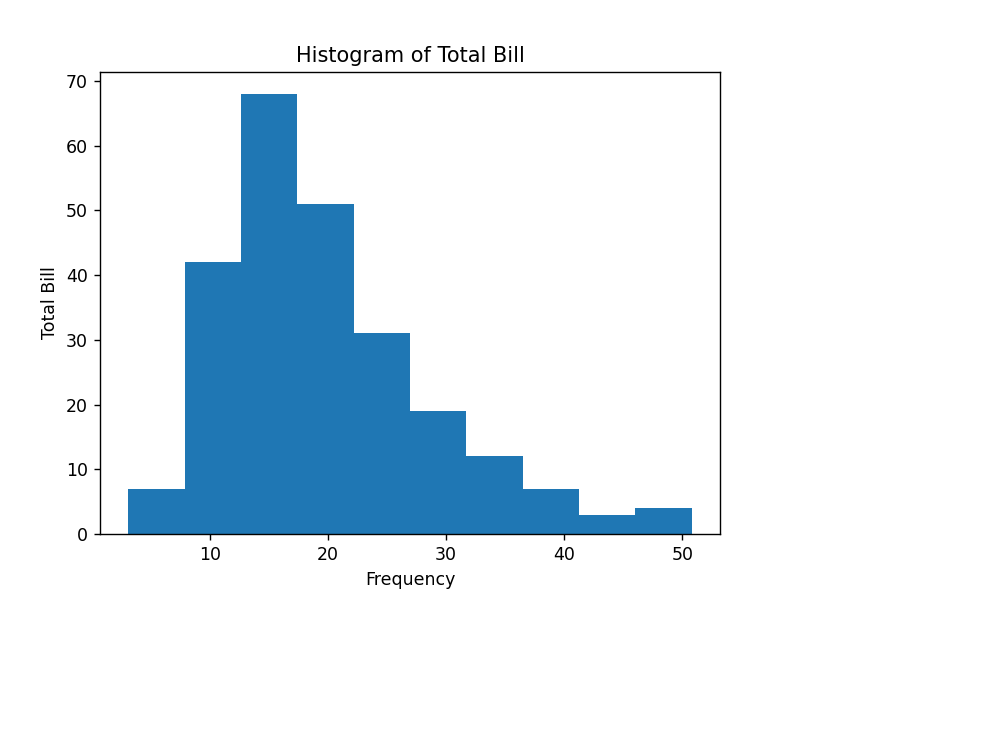

Text(0, 0.5, 'Total Bill')

In [22]:
# 기본 틀 및 격자 생성
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

#### 3. 산점도 그래프

산점도 그래프를 그려보자. 마찬가지로 기본틀과 그래프 격자를 만들고 scatter 메서드에 total_bill, tips 열을 전달하면 산점도 그래프가 생성된다.

<IPython.core.display.Javascript object>


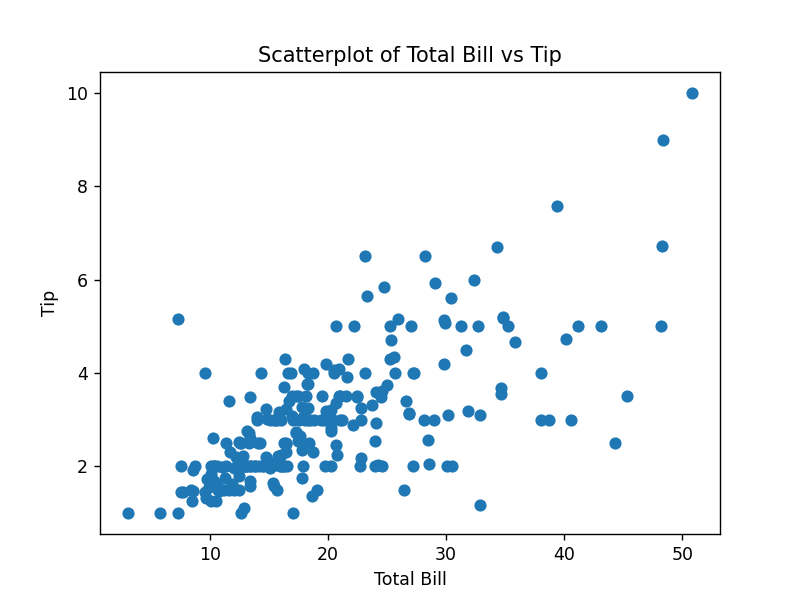

Text(0, 0.5, 'Tip')

In [25]:
# 기본 틀 및 격자 생성
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### 4. 박스 그래프

이번에는 박스 그래프를 알아보자. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프로, boxplot 메서드를 사용한다.

<IPython.core.display.Javascript object>


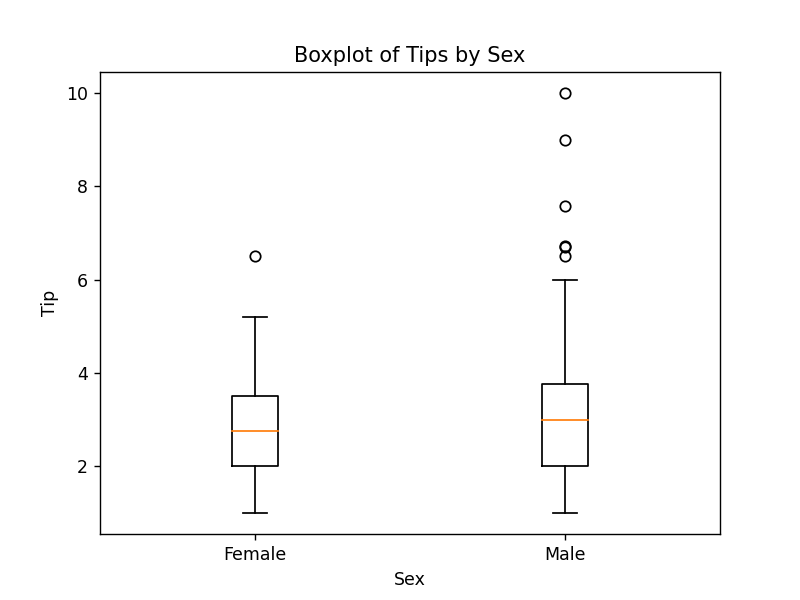

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [28]:
# 기본 틀 및 격자생성
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프

이번에는 변수가 3개 이상을 하나의 그래프로 표현할 수 있는 다변량 그래프를 그려보도록 하자.

### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프

#### 1.
직전에 그렸던 산저도 그래프에 성별을 새 변수로 추가 해보자. 성별은 산점도 그래프에서 색상으로 구분함하면 적당하다. 하지만 Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없다. 0,1과 같은 정수를 사용해야 한다. 따라서 각 문자열을 정수로 치환하는 함수를 만들어야 한다. 다음은 여서인경우 0을 반환 하고 남성인 경우 1을 반환하는 함수이다.

In [29]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

#### 2. 
이제 recode_sex 메서드가 반환한 값을 데이터프레임에 추가해보자. 다음은 recode_sex 함수가 반환한 값을 데이터프레임에 sex_color 열을 새로 생성하여 추가한 것이다. 이때 sex 열에 recode_sex 함수를 브로드캐스팅하기 위하여 apply 메서드를 사용한다.

In [30]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

#### 3. 
그래프를 그리는 김에 테이블당 인원수도 산점도 그래프에 추가해보자. 테이블당 인원수는 점의 크기로 표현하면 적당하다. 다음은 scatter 메서드에 s,c 인자로 테이블당 인원 수와 성별의 치환값을 전달한 것이다.

<IPython.core.display.Javascript object>


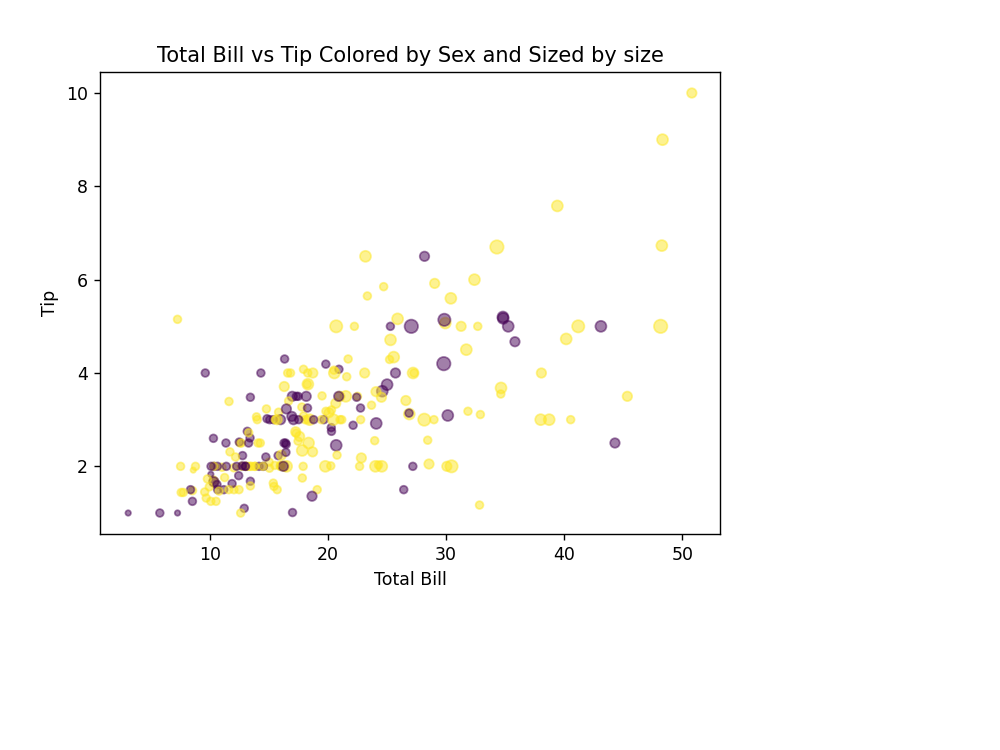

Text(0, 0.5, 'Tip')

In [33]:
# 기본 틀 및 격자 생성
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['sex_color'],
    alpha = 0.5
)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 4-2 seaborn 라이브러리 자유자재로 사용하기

seaborn 라이브러리를 사용하여 그래프를 그려보자. seaborn 라이브러리를 사용하면 matplotlib보다 좀 더 화려한 그래프를 그릴 수 있다.

### 단변량 그래프 그리기 - 히스토그램

#### 1. 
지금부터 seaborn 라이브러리를 sns라 칭하도록 하자. 다시 tips 데이터 집합을 불러오자. 

In [34]:
import seaborn as sns

tips = sns.load_dataset("tips")

#### 2. 
seaborn 라이브러리로 히스토그램을 그리려면, subplots, displot 메서드를 사용하면 된다. 먼저 subplots 메서드로 기본 틀을 만들고 distplot 메서드에 total_bill 열 데이터를 전달하면 히스토그램을 그릴 수 있다.

<IPython.core.display.Javascript object>


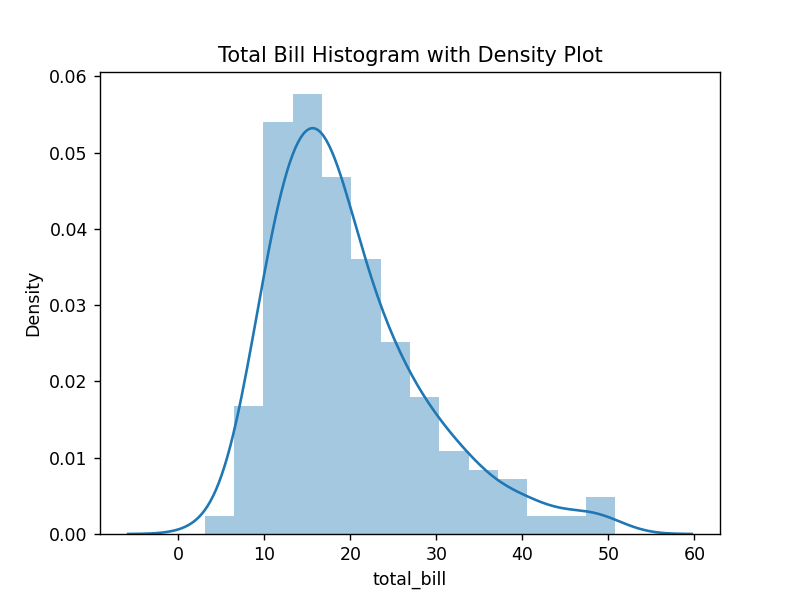

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [37]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

#### 3. 
이때 distplot 메서드를 사용하면 히스토그램과 밀집도 그래프를 같이 그린다. 만약 밀집도 그래프를 제외하려면 kde 옵션을 False로 설정하면 된다.

<IPython.core.display.Javascript object>


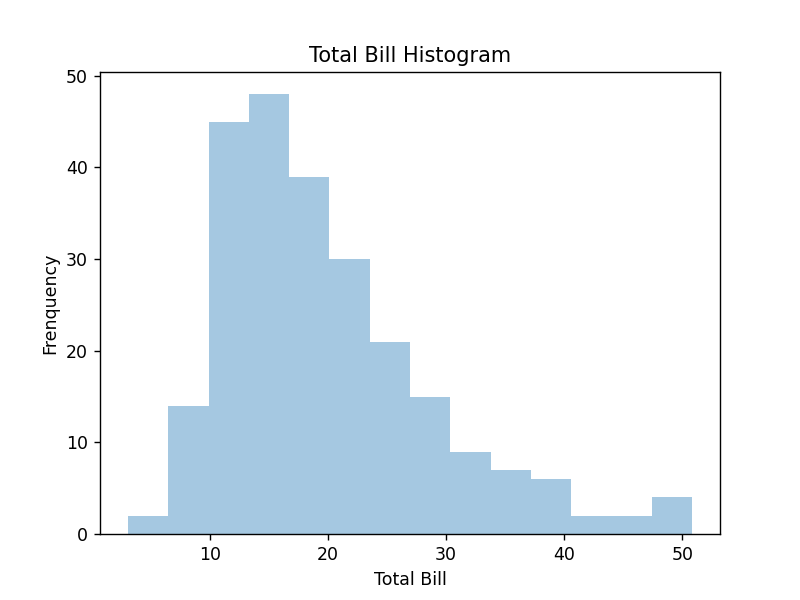

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frenquency')

In [39]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frenquency')

#### 4. 
밀집도 그래프만 나타대려면 hist인자를 False로 지정하자.

<IPython.core.display.Javascript object>


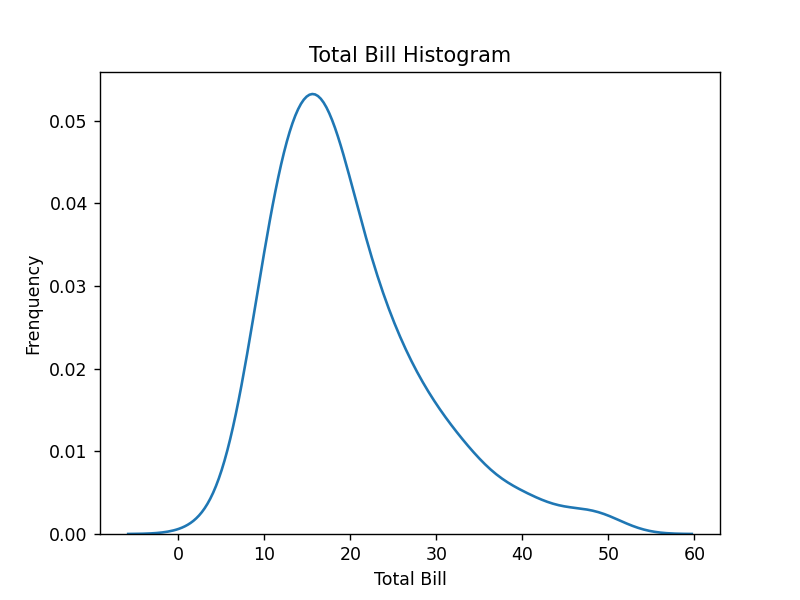

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frenquency')

In [41]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frenquency')

#### 5. 
실무 환경에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한 번에 출력하는 경우가 많다. 다음은 히스토그램과 밀집도를 그리는 distplot 메서드에 rug 인자를 추가 하여 그린 것이다.

<IPython.core.display.Javascript object>


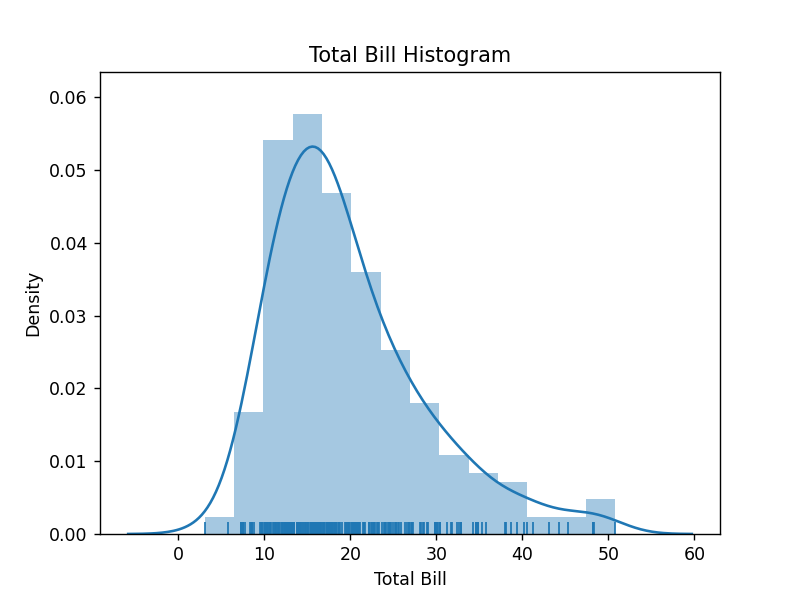

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

In [43]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')

#### 6. 
이번에는 바그래프를 그려보자. 

<IPython.core.display.Javascript object>


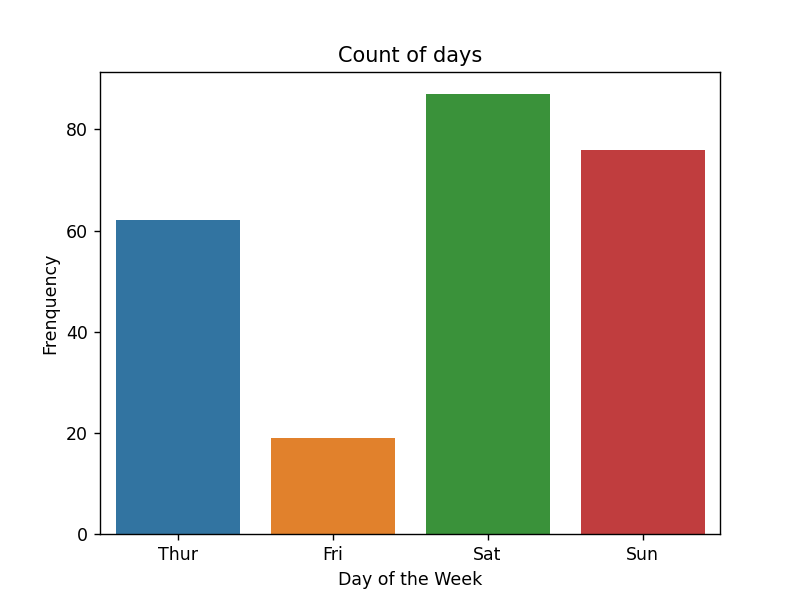

/home/owen/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frenquency')

In [44]:
ax = plt.subplots()
ax = sns.countplot(tips['day'], data = tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frenquency')

### 다양한 종류의 이변량 그래프 그리기

#### 1. seaborn 라이브러리로 산점도 그래프 그리기

seaborn 라이브러리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다. 산점도 그래프를 그리기 위해서는 seaborn 라이브러리의 regplot 메서드를 사용해야 한다. regplot 메서드를 사용하면 산점도 그래프와 회귀선을 함께 그릴 수 있다. 만약 회귀선을 제거하려면 fit_reg 인자를 False로 지정하면 된다

<IPython.core.display.Javascript object>


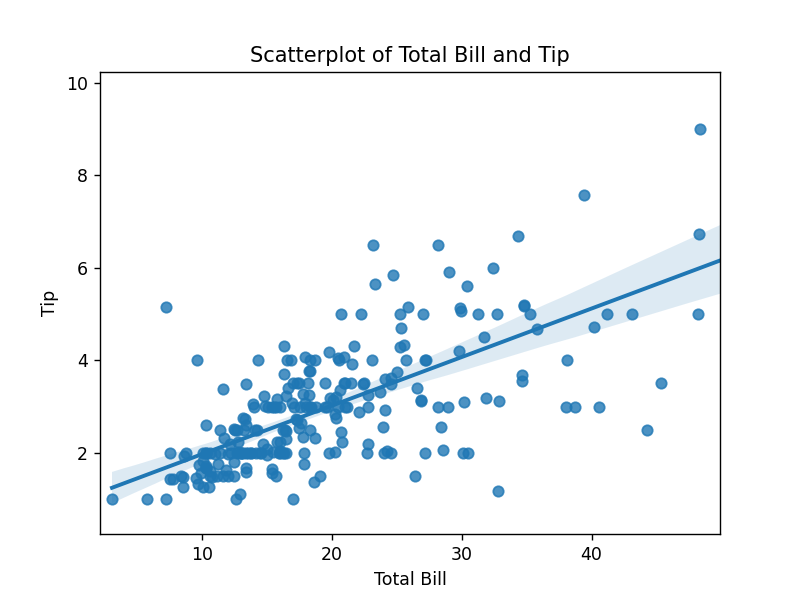

Text(0, 0.5, 'Tip')

In [46]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y = 'tip', data = tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


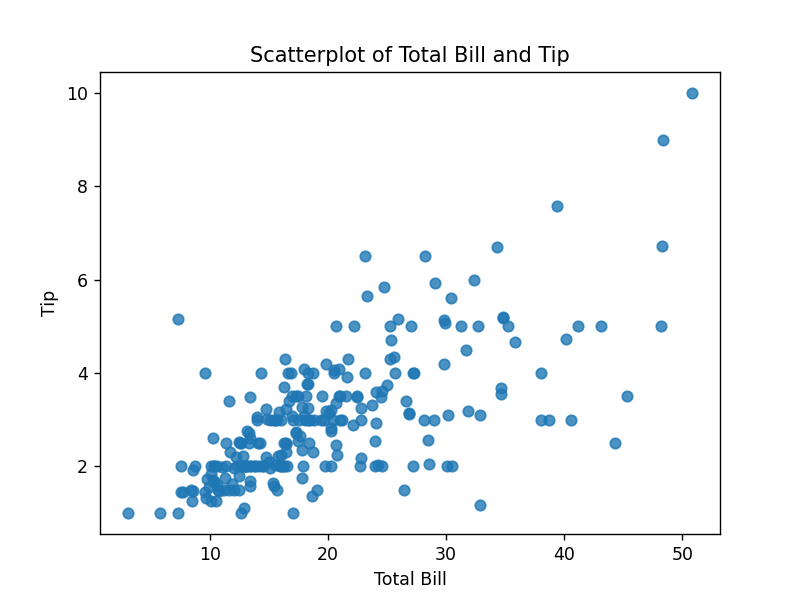

Text(0, 0.5, 'Tip')

In [47]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y = 'tip', data = tips, fit_reg = False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 2. 
이번에는 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot 메서드를 사용해보자. x,y 인자에 원하는 열 이름을 지정하고 data 인잣값으로 데이터 프레임을 지정하면 그래프를 그리 수 있다.

<IPython.core.display.Javascript object>


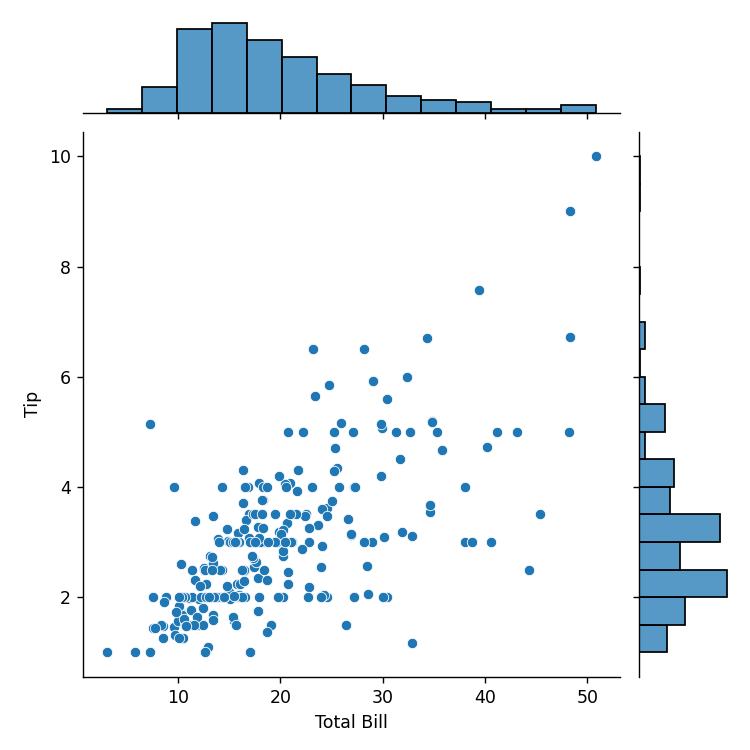

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [49]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel = 'Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y=1.03)

#### 3. 
산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 만약 산점도 그래프의 데이터를 구분하기 쉽게 그래고 싶다면 육각 그래프(hexbin)를 사용하면 된다. 육각 그래프는 2차원 표면에 육각형으로 데이터를 샇아 표현하는 그래프이다. 그래서 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현이 되어 시각화에 좋은 장점이 있다.

<IPython.core.display.Javascript object>


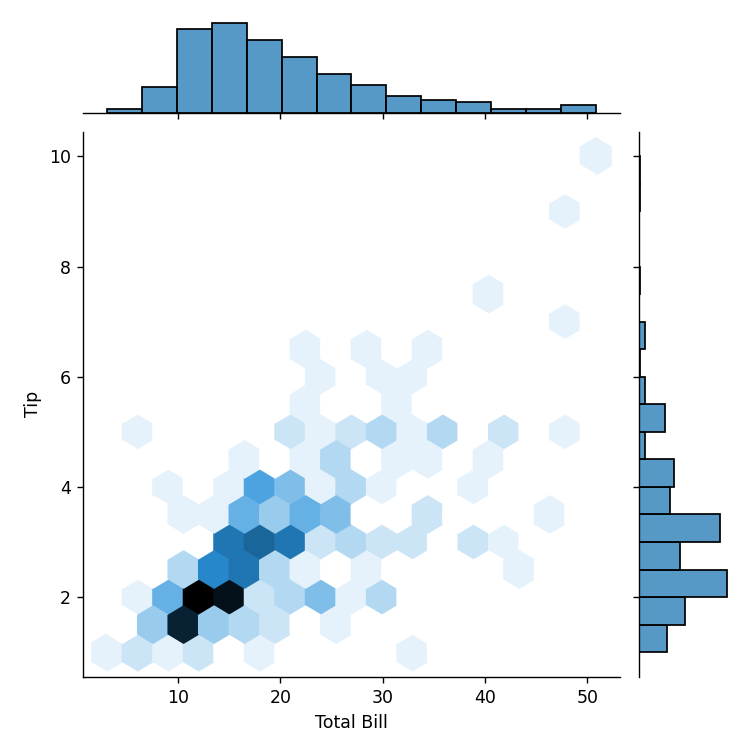

Text(0.5, 1.03, 'hexbin Joint Plot of Total Bill and Tip')

In [50]:
hexbin = sns.jointplot(x = "total_bill", y = "tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel = 'Tip')
hexbin.fig.suptitle('hexbin Joint Plot of Total Bill and Tip', fontsize = 10, y=1.03)

#### 4. 2차원 밀집도 그리기 

이번에는 2차원 밀집도를 그려보자. kdeplot 메서드를 사용하며, total_bill, tip 열 데이터를 사용하여 그려보려 한다.

<IPython.core.display.Javascript object>


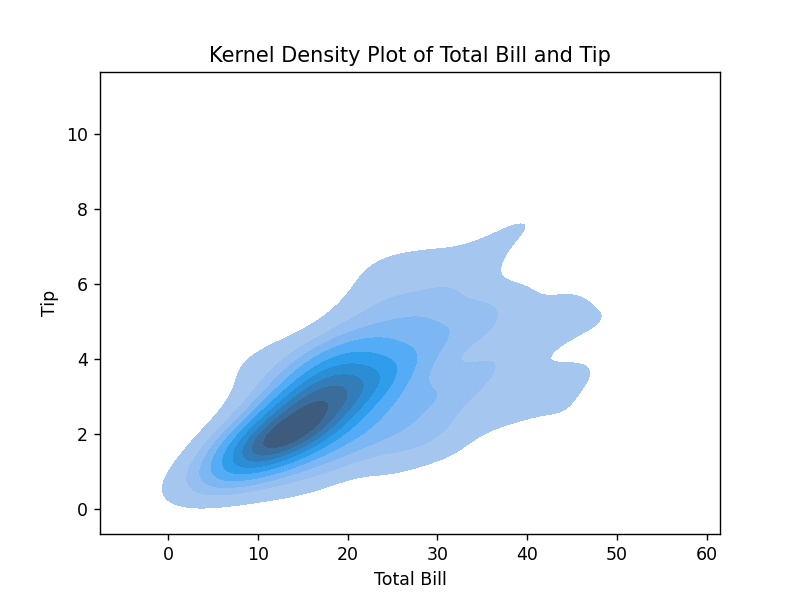

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:1639: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

In [51]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 5. 바 그래프

이번에는 바 그래프를 그려보자. 

<IPython.core.display.Javascript object>


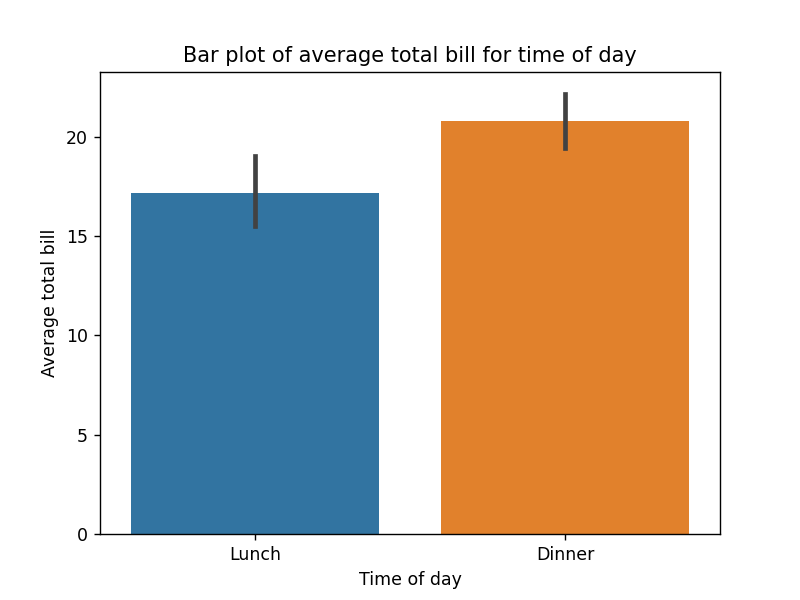

Text(0, 0.5, 'Average total bill')

In [52]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### 6. 박스 그래프 그리기
박스 그래프를 그려보자. 박스 그래프는 최솟값, 1분윗, 중간값, 3분위수, 최댓값 이상치 등 다양한 통계량을 한번에 표현하는 그래프이다.

<IPython.core.display.Javascript object>


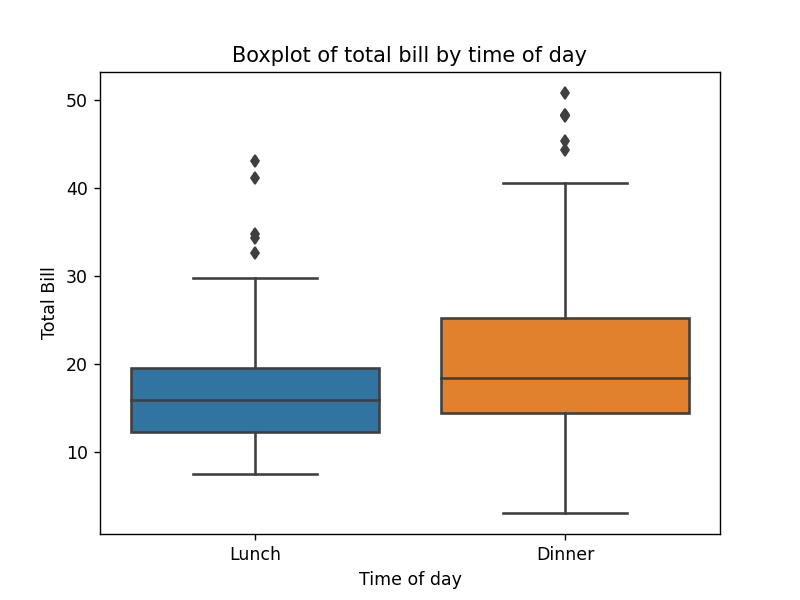

Text(0, 0.5, 'Total Bill')

In [53]:
ax = plt.subplots()
ax = sns.boxplot(x = 'time', y = 'total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 7.

박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용되는 그래프이지만 데이터 분산이 모호하게 표현된다. 이런 경우에 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 더 알아보기가 쉽다. 바이올린 그래프는 violinplot 메서드를 사용하여 그릴 수 있다.

<IPython.core.display.Javascript object>


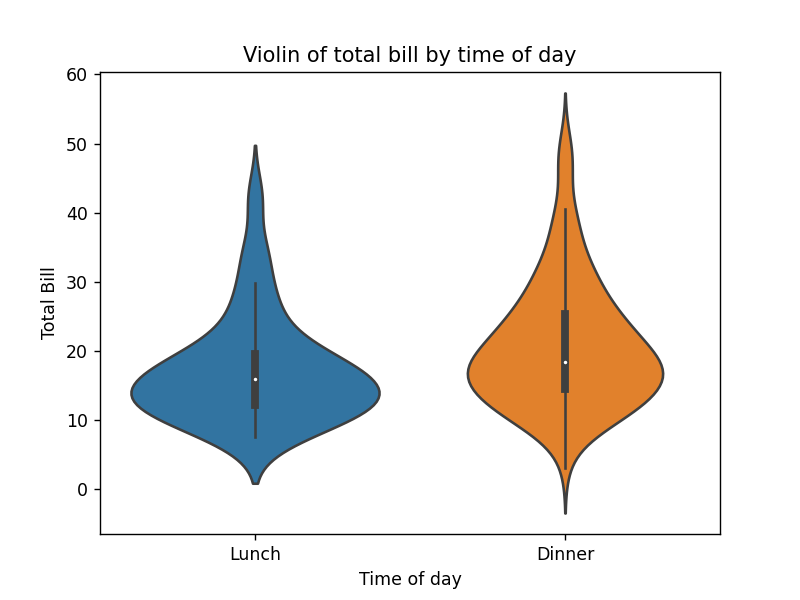

Text(0, 0.5, 'Total Bill')

In [54]:
ax = plt.subplots()
ax = sns.violinplot(x = 'time', y = 'total_bill', data=tips)
ax.set_title('Violin of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 8. 관계 그래프 그리기 

마지막으로 관계그래프를 그려보자. 관계 그래프는 지금까지 설명한 그래프를 종합한 그래프라고 생각하면 된다. pairplot 메서드를 사용하면 된다.

<IPython.core.display.Javascript object>


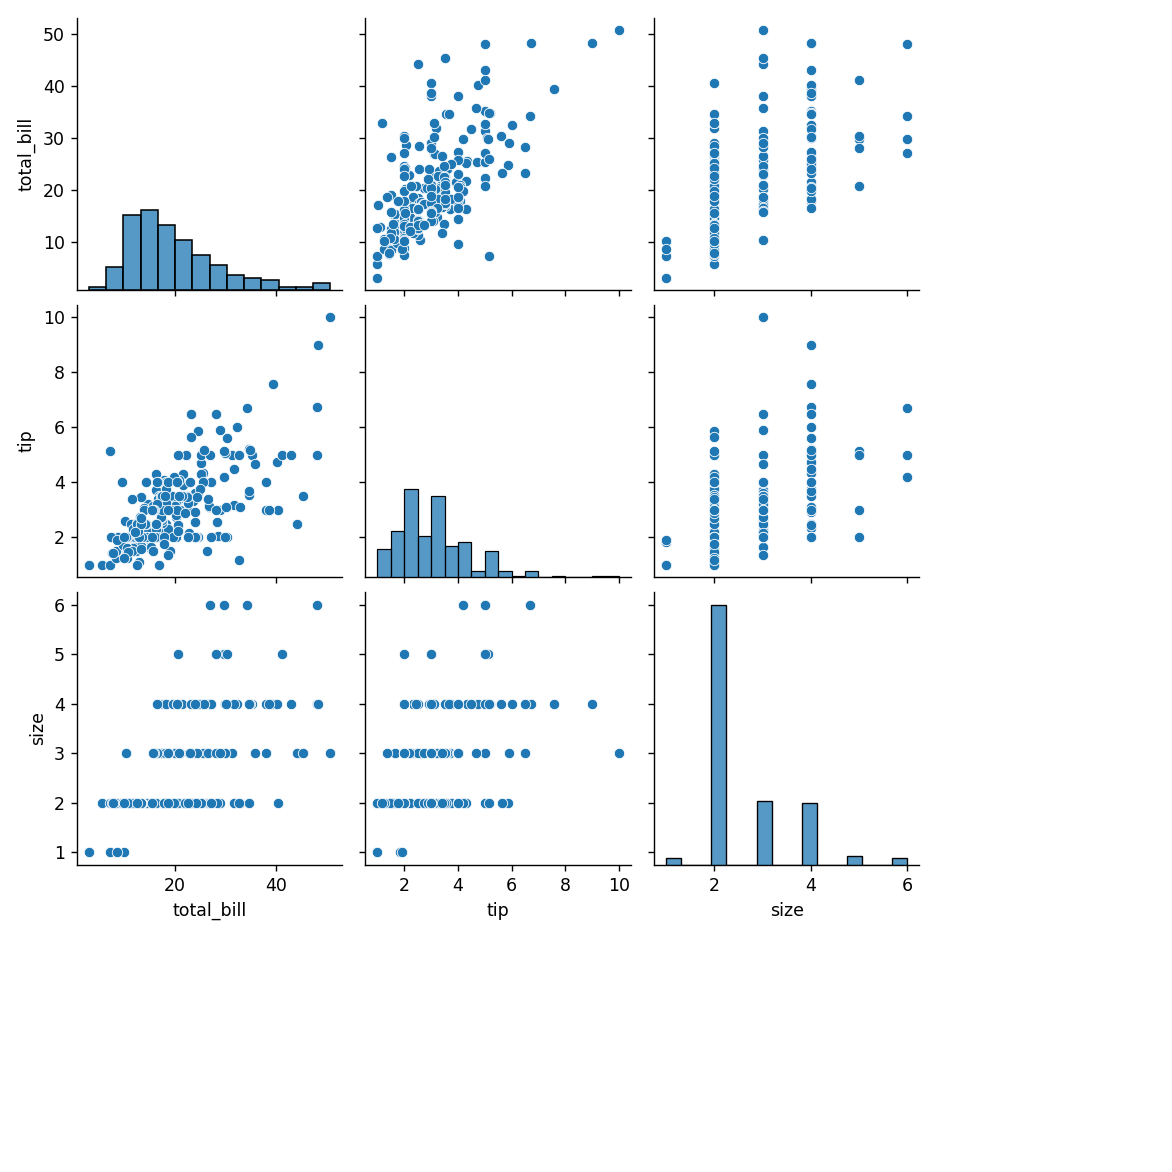

In [55]:
fig = sns.pairplot(tips)

#### 9. 

관계 그래프는 중복된 정보가 표현되는데 나머지 위치에 새로운 그래프를 지정하여 그릴 수 있다. map_upper 메서드는 대각선을 기준으로 위쪽에 그릴 그래프를 지정핞다. 반대로 map_lower 메서드는 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다. map_diag는 대각선을 중심으로 그래프를 그린다. 다음은 이차원 밀집도를 대각선 기준으로 아래쪽에, 산점도 그래프는 대각선 기준으로 위쪽에 그린 것이다. 히스토그램과 밀집도는 대각선을 중심으로 그려진다.

/home/owen/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<IPython.core.display.Javascript object>


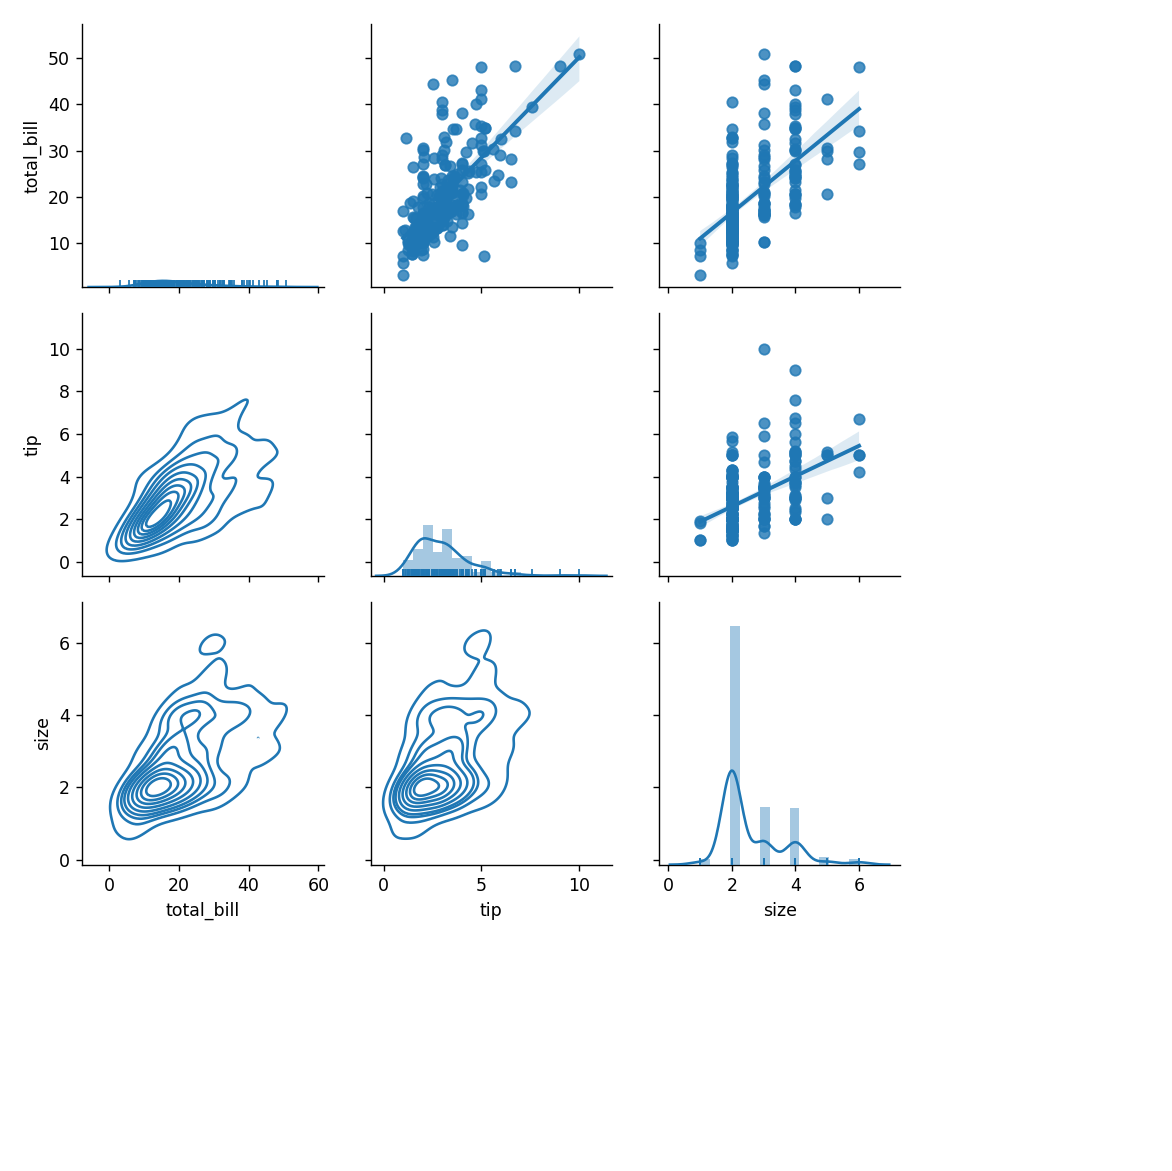

/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/owen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/owen/.local/lib/python3.6/site-packages/s

In [57]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()